<a href="https://colab.research.google.com/github/HimanshuP8983/Deep-Learning/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline 
from fastai.basics import *

In [ ]:
n = 100

In [ ]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.5554,  1.0000],
        [ 0.7087,  1.0000],
        [-0.6371,  1.0000],
        [ 0.9329,  1.0000],
        [-0.3159,  1.0000]])

In [ ]:
a = tensor(3.,2)
a

tensor([3., 2.])

In [ ]:
y = x@a + 0.25*torch.randn(n)

In [ ]:
y

tensor([ 3.9087,  4.1337, -0.1632,  4.1801,  1.2662,  0.6040,  4.9249,  4.2989,
         0.1668, -1.0338,  1.5153, -0.5947,  2.2730,  1.7193,  2.7969,  2.0431,
         0.2152,  0.9890,  0.9638, -0.3767,  3.5737, -0.6301,  2.2305, -0.1491,
         1.4341, -0.0856,  4.0000,  1.3862,  4.1933,  1.6068,  1.6058,  3.9597,
         4.9193,  4.9445,  0.7623,  3.7785,  3.6653, -0.4389,  4.8033,  0.8143,
         2.2468,  2.7467,  1.9268,  3.9030,  3.7814,  0.4039,  0.9498,  0.0297,
         3.4263,  2.1347, -0.0113,  0.3346,  0.1171,  2.9856,  3.2268,  1.5958,
         1.5186,  1.7870,  2.6815,  0.9040,  3.6804,  1.1833,  0.5876,  3.9655,
         2.1248,  4.1324,  4.0956,  3.2076,  4.3078,  2.4663,  2.0592,  2.1934,
         1.1354,  4.4818,  0.9990,  1.1393,  1.4750,  3.4965,  3.7834,  2.3689,
        -0.1475,  1.4213, -0.2348,  3.5713,  4.0876,  1.8890,  4.6230,  4.4951,
         0.6237,  0.6751, -0.1097,  1.8947,  3.0818,  3.8204,  4.6850,  0.1139,
         2.3152,  3.0094,  1.5246,  3.02

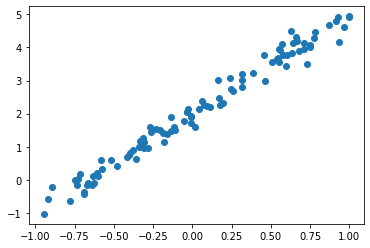

In [ ]:
plt.scatter(x[:,0],y)

In [ ]:
doc(mse)

In [ ]:
def mse(y_hat,y): return ((y_hat-y)**2).mean()

In [ ]:
a = tensor(-1,1.)

In [ ]:
y_hat = x@a

In [ ]:
y_hat

tensor([0.4446, 0.2913, 1.6371, 0.0671, 1.3159, 1.5793, 0.0755, 0.2239, 1.7160,
        1.9438, 1.2055, 1.9201, 0.9251, 1.0101, 0.6864, 1.0355, 1.6085, 1.3284,
        1.2815, 1.6899, 0.4477, 1.7765, 0.9091, 1.7330, 1.2607, 1.6233, 0.2525,
        1.1612, 0.3365, 1.2700, 1.1166, 0.4459, 0.0058, 0.0057, 1.4025, 0.3944,
        0.4585, 1.6893, 0.0876, 1.3980, 0.8230, 0.7568, 1.0093, 0.3235, 0.4206,
        1.4830, 1.3055, 1.7253, 0.4069, 1.0304, 1.7477, 1.5730, 1.6358, 0.5353,
        0.6149, 0.9817, 1.1107, 1.0506, 0.7401, 1.3762, 0.4546, 1.3312, 1.5166,
        0.2886, 0.9597, 0.3611, 0.4265, 0.6847, 0.3404, 0.8284, 1.0316, 0.8847,
        1.1777, 0.2181, 1.3427, 1.3051, 1.1339, 0.2695, 0.5425, 0.9372, 1.6729,
        1.1843, 1.8944, 0.4903, 0.2507, 1.1386, 0.0323, 0.3750, 1.3562, 1.4153,
        1.6618, 1.0114, 0.7580, 0.3665, 0.1281, 1.6000, 0.8036, 0.8375, 1.2286,
        0.6819])

In [ ]:
mse(y_hat,y)

tensor(6.0486)

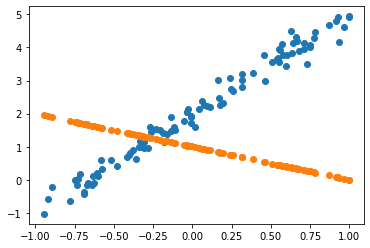

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [ ]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [ ]:
def update():
  y_hat = x@a
  loss = mse(y,y_hat)
  if t%10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [ ]:
lr = 1e-1
for t in range(100): update()

tensor(6.0486, grad_fn=<MeanBackward0>)
tensor(1.4176, grad_fn=<MeanBackward0>)
tensor(0.4659, grad_fn=<MeanBackward0>)
tensor(0.1803, grad_fn=<MeanBackward0>)
tensor(0.0930, grad_fn=<MeanBackward0>)
tensor(0.0664, grad_fn=<MeanBackward0>)
tensor(0.0582, grad_fn=<MeanBackward0>)
tensor(0.0557, grad_fn=<MeanBackward0>)
tensor(0.0550, grad_fn=<MeanBackward0>)
tensor(0.0547, grad_fn=<MeanBackward0>)


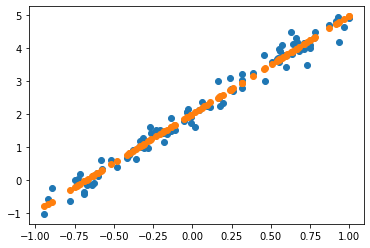

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach())

In [ ]:
from matplotlib import animation,rc
rc('animation',html='jshtml')

In [ ]:
a = nn.Parameter(tensor(-1.,1))

In [ ]:
fig = plt.figure()
plt.scatter(x[:,0],y)
line, = plt.plot(x[:,0],x@a.detach(),c="orange",scalex=True)
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a.detach())
  return line,

animation.FuncAnimation(fig,animate,np.arange(0,100),interval=20)
